In [10]:
import pandas as pd

In [11]:
df=pd.read_csv('titanic.csv')

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.drop(['PassengerId','Name','SibSp','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df.head(2)

KeyError: "['PassengerId' 'Name' 'SibSp' 'Ticket' 'Cabin' 'Embarked'] not found in axis"

In [19]:
df['Age'].mean().astype(int)

29

In [21]:
df['Age'].fillna(df['Age'].mean().astype(int),inplace=True)

In [25]:
df['Age']=df['Age'].astype(int)

In [27]:
df.head()

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,male,22,0,7.2500
1,1,1,female,38,0,71.2833
2,1,3,female,26,0,7.9250
3,1,1,female,35,0,53.1000
4,0,3,male,35,0,8.0500


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [31]:
df['Sex']=le.fit_transform(df['Sex'])

In [32]:
df.head(2)

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,1,22,0,7.2500
1,1,1,0,38,0,71.2833


In [51]:
input_n=df.drop('Survived',axis=1)
input_n

,Pclass,Sex,Age,Parch,Fare
0,3,1,22,0,7.2500
1,1,0,38,0,71.2833
2,3,0,26,0,7.9250
3,1,0,35,0,53.1000
4,3,1,35,0,8.0500
...,...,...,...,...,...
886,2,1,27,0,13.0000
887,1,0,19,0,30.0000
888,3,0,29,2,23.4500
889,1,1,26,0,30.0000


In [50]:
target=df.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(input_n,target,test_size=0.2)


In [40]:
from sklearn import tree

In [47]:
model=tree.DecisionTreeClassifier()

In [53]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
y_repdicted=model.predict(x_test)
y_repdicted

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [64]:
y_test

137    0
250    0
814    0
58     1
572    1
      ..
254    0
189    0
890    0
115    0
687    0
Name: Survived, Length: 179, dtype: int64

In [60]:
len(y_repdicted)

179

In [71]:
model.score(x_test,y_test)

0.7877094972067039

In [72]:
from sklearn.metrics import confusion_matrix

In [74]:
cm=confusion_matrix(y_test,y_repdicted)

In [75]:
cm

array([[96, 18],
       [20, 45]], dtype=int64)

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

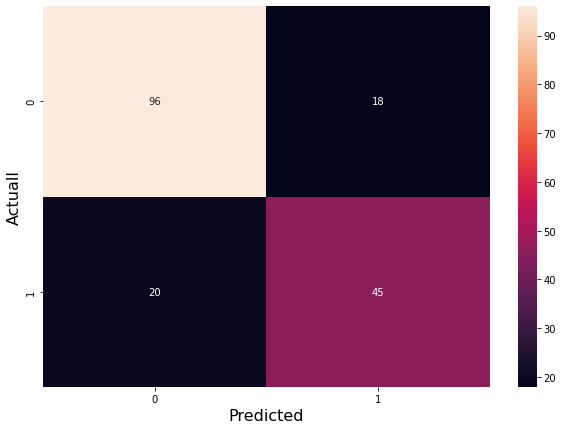

In [84]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted",fontsize=16)
plt.ylabel("Actuall",fontsize=16)
plt.show()

In [85]:
model2=tree.DecisionTreeClassifier()

In [86]:
model2.fit(input_n,target)

DecisionTreeClassifier()

In [87]:
model2.score(input_n,target)

0.9753086419753086

In [90]:
model2.predict([[1,0,38,0,5.2833]])

c:\users\shivam\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int64)